In [10]:
%matplotlib inline

In [11]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [13]:
from divers import plot_confusion_matrix

In [14]:
import sys
sys.path.append('./sompyLatmos/')     # Chemin du package
from sompy import SOMFactory
from sompy import SOMData

### Chargement et mise en forme des données

Chargement des différents jeux de représentation

In [16]:
# les imagettes 
x = np.loadtxt("./donnees/x.txt")
x_comp_names = [ "x["+str(i)+"]" for i in range(x.shape[0])]
#
# différentes projections des imagettes
hx = np.loadtxt("./donnees/hx.txt")
hx_comp_names = [ "hx["+str(i)+"]" for i in range(hx.shape[0])]
hy_comp_names = [ "hy["+str(i)+"]" for i in range(hx.shape[0])]
#
hx_hy = np.loadtxt("./donnees/hx_hy.txt")
hx_hy_comp_names = []
hx_hy_comp_names.extend(hx_comp_names)
hx_hy_comp_names.extend(hy_comp_names)
#
pb_comp_names = [ "pb["+str(i)+"]" for i in range(hx.shape[0])]
ph_comp_names = [ "ph["+str(i)+"]" for i in range(hx.shape[0])]
pb_ph = np.loadtxt("./donnees/pb_ph.txt")
pb_ph_comp_names = []
pb_ph_comp_names.extend(pb_comp_names)
pb_ph_comp_names.extend(ph_comp_names)
#
pg_comp_names = [ "pg["+str(i)+"]" for i in range(hx.shape[0])]
pd_comp_names = [ "pd["+str(i)+"]" for i in range(hx.shape[0])]
pg_pd = np.loadtxt("./donnees/pg_pd.txt")
pg_pd_comp_names = []
pg_pd_comp_names.extend(pg_comp_names)
pg_pd_comp_names.extend(pd_comp_names)
#
# combinaisons de projections
hx_hy_pb_ph = np.loadtxt("./donnees/hx_hy_pb_ph.txt")
hx_hy_pb_ph_comp_names = []
hx_hy_pb_ph_comp_names.extend(hx_hy_comp_names)
hx_hy_pb_ph_comp_names.extend(pb_ph_comp_names)
#
hx_hy_pg_pd = np.loadtxt("./donnees/hx_hy_pg_pd.txt")
hx_hy_pg_pd_comp_names = []
hx_hy_pg_pd_comp_names.extend(hx_hy_comp_names)
hx_hy_pg_pd_comp_names.extend(pg_pd_comp_names)


**Choix d'une représentation des données** 

In [17]:
#strChoix = 'x' problematique en théorie et en pratique
#strChoix = 'hx'
strChoix = 'hx_hy'
#strChoix = 'pb_ph'
#strChoix = 'pg_pd'
#strChoix = 'hx_hy_pb_ph'
#strChoix = 'hx_hy_pg_pd'
if strChoix == 'x':
    data = x.T
    comp_names = x_comp_names
elif strChoix == 'hx':
    data = hx.T
    comp_names = hx_comp_names
elif strChoix == 'hx_hy':
    data = hx_hy.T
    comp_names = hx_hy_comp_names
elif strChoix == 'pb_ph':
    data = pb_ph.T
    comp_names = pb_ph_comp_names
elif strChoix == 'pg_pd':
    data = pg_pd.T
    comp_names = pg_pd_comp_names
elif strChoix == 'hx_hy_pb_ph':
    data = hx_hy_pb_ph.T
    comp_names = hx_hy_pb_ph_comp_names
elif strChoix == 'hx_hy_pg_pd':
    data = hx_hy_pg_pd.T
    comp_names = hx_hy_pg_pd_comp_names
else:
    raise ValueError('choix inattendu')
masque=np.ones(len(comp_names))
del x, hx, hx_hy, pb_ph, pg_pd, hx_hy_pb_ph, hx_hy_pg_pd


Ici on a aussi les étiquettes correspondant à chacune des données. On les utilisera par la suite pour voir les performances de **l'algorithme qui est on le rappelle non supervisé**.   
On se servira de ces etiquettes pour évaluer la qualité du "résumé numérique" fourni par la carte topologique.

In [18]:
t = np.loadtxt("./donnees/t.txt").T
t[np.where(t==-1)] = 0
t_label_num = np.where(t==1)[1]
classnames = ['zero','un','deux','trois','quatre','cinq','six','sept','huit','neuf']
data_labels = [ classnames[i] for i in t_label_num]

Ici, on va mettre quelques données de coté pour évaluer les performances de l'apprentissage. Notamment pour évaluer la capacité de la partition réalisée par la carte en terme de classification des chiffres manuscrits.
Là encore, on rappelle que l'algorithme est non supervisé. Les étiquettes '`t`) ne sont pas prises en compte. Lors de l'apprentissage. La partition de la carte sera basée uniquement sur les données apprises (`X`). 
On évaluera la capacité de la carte à exploiter l'information fournie dans `X`.

In [19]:
N = 34*10
# rescale the data, use the traditional train/test split
data, data_ = data[:N,:], data[N:,:]
t_label_num, t_label_num_ = t_label_num[:N], t_label_num[N:]
data_labels,data_labels_ = np.array(data_labels[:N]), np.array(data_labels[N:])
data.shape

(340, 32)

**Création d'un objet sData**

In [20]:
sData = SOMData(data,      # les données 
                comp_names,# les noms des variables
                data_labels,# les potentielles étiquettes 
                normalization = "var")

**Affichage des T-SNE**

In [21]:
#sData.plot_tsne()

### Création de la carte et apprentissage

#### Création d'une carte topologique (objet sm)

In [22]:
#mapsize=(10,1)
mapsize=(7,7)
#mapsize=(10,10)
mapsize=(3,7)
sm = SOMFactory().build(sData, 
                        mapsize=mapsize,
                        normalization = None, 
                        initialization='random', # obligatoire pour x
                        #initialization='pca',  
                        radius_train ='linear', 
                        name='Des Chiffres',
                        #lattice='rect',
                        lattice='hexa',
                        mask=masque,
                        components_to_plot=((0,1),(0,2),(1,2)))

#### Entraînement de la carte

Training ...
 Rough training...
radius_ini: 3.000 , radius_final: 1.000, trainlen: 30

Epoch : 0 qErr : 0.7293  tErr : 0.3088
Epoch : 1 qErr : 0.7095  tErr : 0.3206
Epoch : 2 qErr : 0.6996  tErr : 0.3794
Epoch : 3 qErr : 0.6930  tErr : 0.4206
Epoch : 4 qErr : 0.6893  tErr : 0.4647
Epoch : 5 qErr : 0.6865  tErr : 0.5176
Epoch : 6 qErr : 0.6839  tErr : 0.5059
Epoch : 7 qErr : 0.6811  tErr : 0.5176
Epoch : 8 qErr : 0.6782  tErr : 0.5235
Epoch : 9 qErr : 0.6757  tErr : 0.5324
Epoch : 10 qErr : 0.6731  tErr : 0.5265
Epoch : 11 qErr : 0.6705  tErr : 0.5206
Epoch : 12 qErr : 0.6678  tErr : 0.5265
Epoch : 13 qErr : 0.6653  tErr : 0.5176
Epoch : 14 qErr : 0.6627  tErr : 0.4971
Epoch : 15 qErr : 0.6600  tErr : 0.4676
Epoch : 16 qErr : 0.6572  tErr : 0.4441
Epoch : 17 qErr : 0.6545  tErr : 0.4265
Epoch : 18 qErr : 0.6514  tErr : 0.4235
Epoch : 19 qErr : 0.6480  tErr : 0.4088
Epoch : 20 qErr : 0.6443  tErr : 0.4176
Epoch : 21 qErr : 0.6410  tErr : 0.4088
Epoch : 22 qErr : 0.6374  tErr : 0.4176
Epo

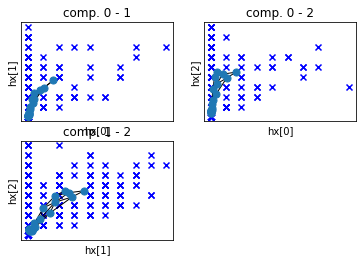

Finetune training
radius_ini: 1.200 , radius_final: 0.100, trainlen: 10

Epoch : 0 qErr : 0.6219  tErr : 0.3882
Epoch : 1 qErr : 0.6124  tErr : 0.4176
Epoch : 2 qErr : 0.6028  tErr : 0.4176
Epoch : 3 qErr : 0.5910  tErr : 0.4529
Epoch : 4 qErr : 0.5784  tErr : 0.4941
Epoch : 5 qErr : 0.5616  tErr : 0.5294
Epoch : 6 qErr : 0.5400  tErr : 0.5618
Epoch : 7 qErr : 0.5125  tErr : 0.5794
Epoch : 8 qErr : 0.5023  tErr : 0.5588
Epoch : 9 qErr : 0.4934  tErr : 0.5118


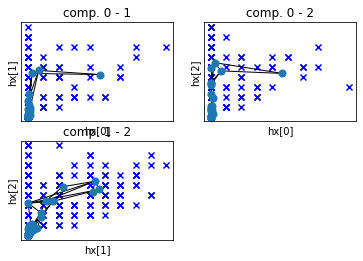

In [23]:
sm.train(n_job=1, 
         verbose=None, 
         train_rough_len=30, 
         train_rough_radiusin=3,
         train_rough_radiusfin=1,
         train_finetune_len=10,
         train_finetune_radiusin=1.2,
         train_finetune_radiusfin=0.1,
         watch_evolution = False)

**Affichage des T-SNE**

In [24]:
#sm.plot_tsne()

#### Autres affichages graphiques :

- **Affichage de la carte**

<Figure size 432x288 with 0 Axes>

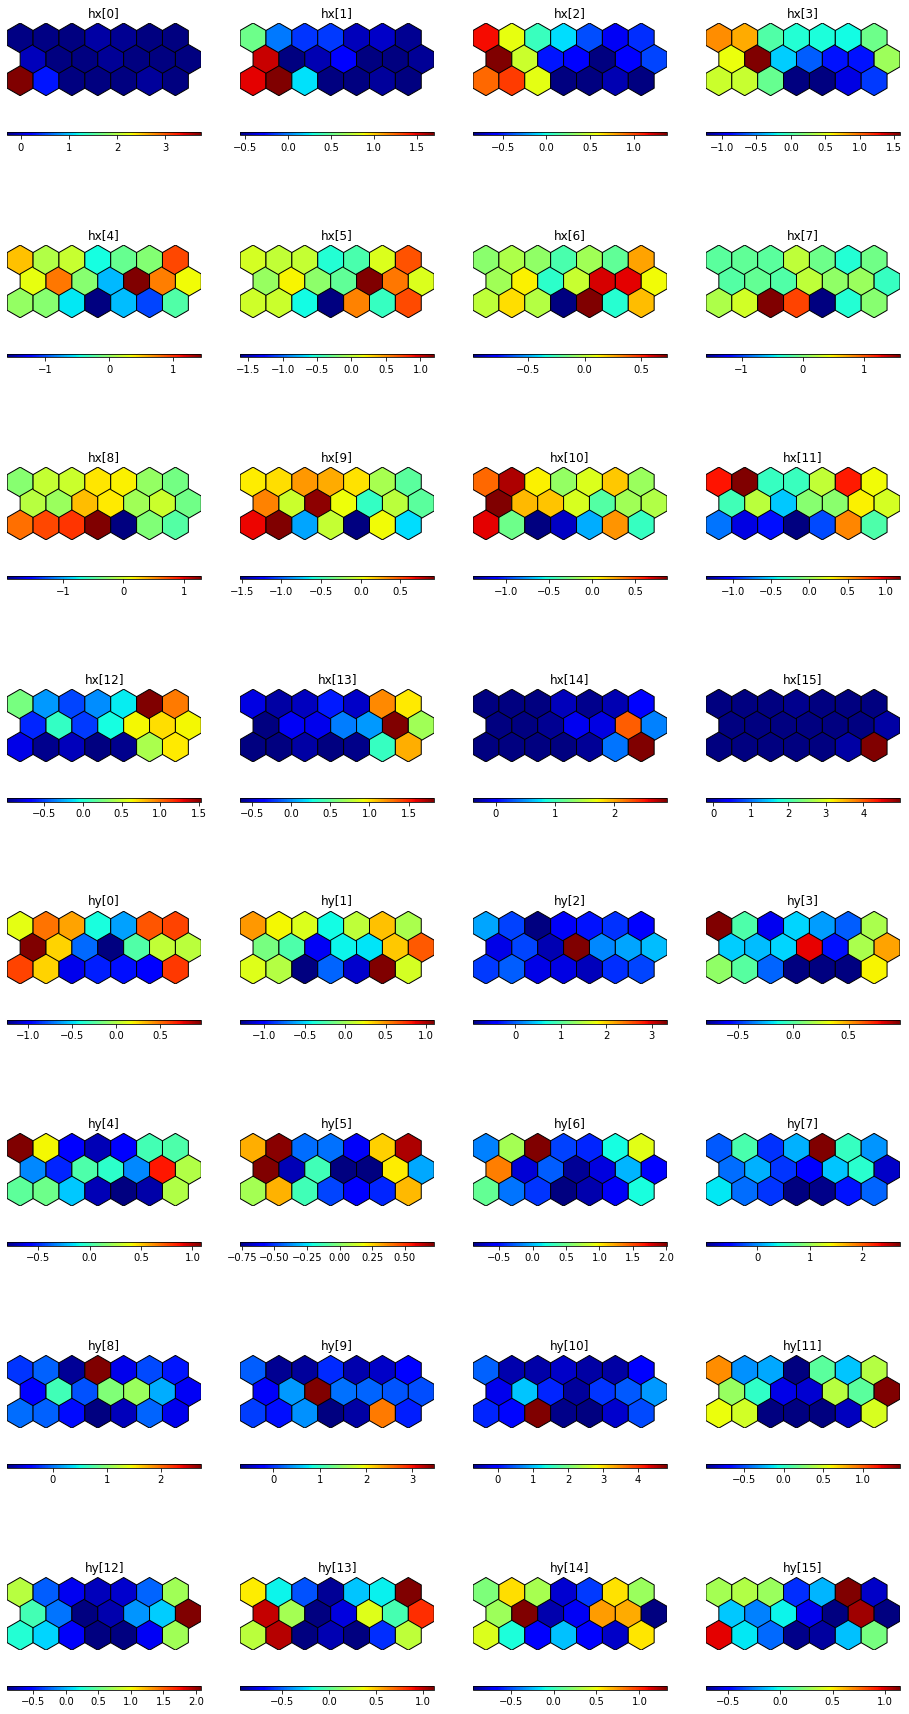

In [25]:
from mapview import View2D
dim = sData._dim
col_sz = 4
view2D  = View2D(16,4*(dim/col_sz),
                 "codage "+strChoix,
                 text_size=10)
view2D.show(sm, col_sz=col_sz, which_dim="all", denormalize=True) ; 

- **Affichage de la carte avec etiquettes (les indices des neurones)**

<Figure size 432x288 with 0 Axes>

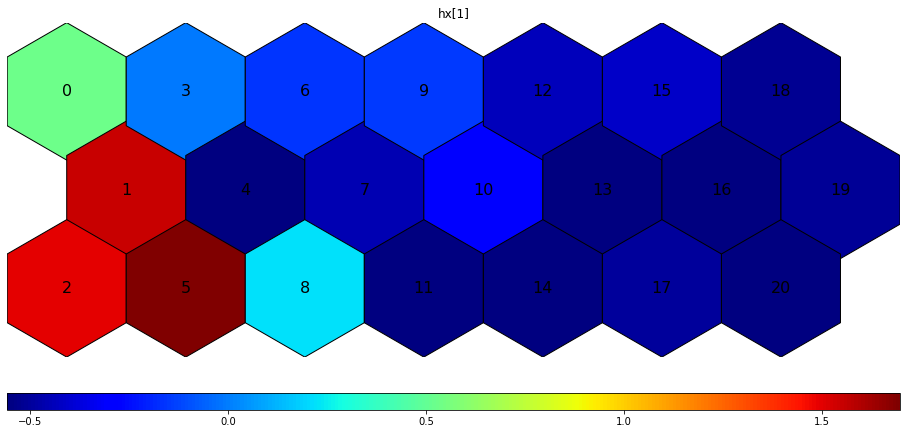

In [26]:
view2D  = View2D(16,10,
                 "codage "+strChoix,
                 text_size=10) ;
view2D.show(sm, neuronLabels=None,anotate=True, col_sz=1, which_dim=1, denormalize=True, labelsize=16) ; 

 - **Affichage de la carte avec les cardinalités**

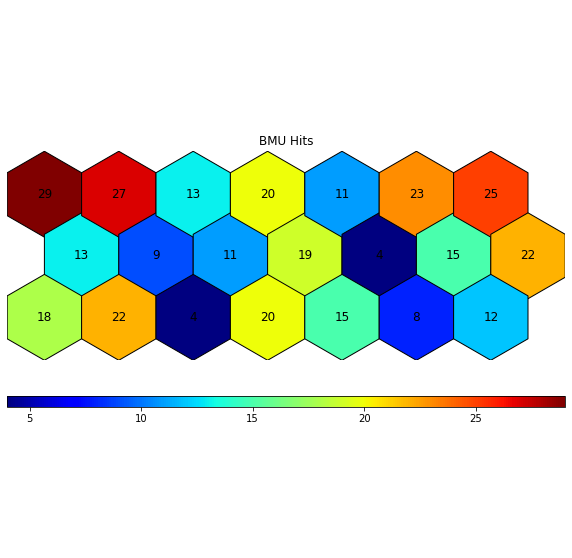

In [27]:
from bmuhits import BmuHitsView
vhts  = BmuHitsView(10,10,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, logaritmic=False)

 - **Affichage de la carte (distances entre les référents/neurones)**

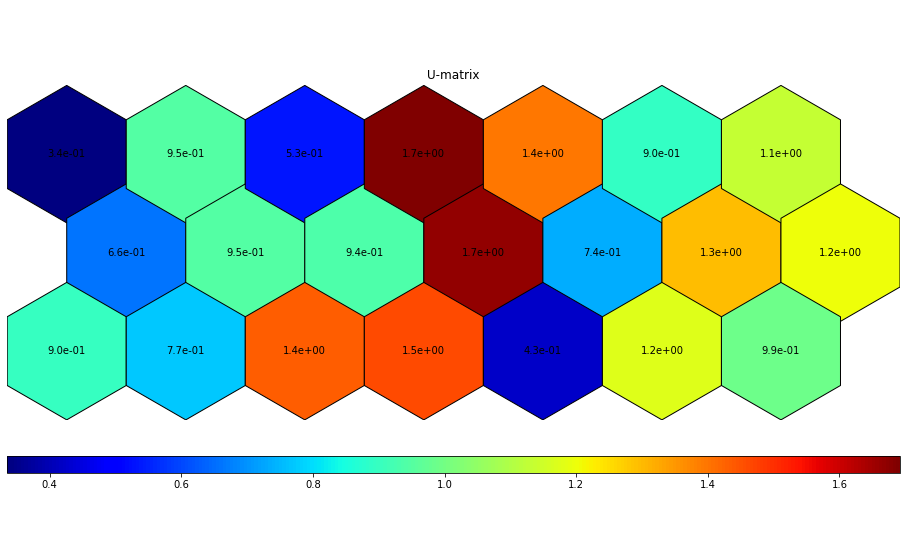

In [28]:
from umatrix import UMatrixView
umat = UMatrixView(16,10,"Unified Distance Matrix", text_size=20)
umat.show(sm) ;

#### Evaluer l'apprentissage de la carte

* **Calcul des erreurs globales**

In [29]:
topographic_error = sm.calculate_topographic_error()
quantization_error = sm.calculate_quantization_error()
print ("Topographic error  = %s\nQuantization error = %s" % (topographic_error, quantization_error))

Topographic error  = 0.5117647058823529
Quantization error = 0.4934174492565796


* **Coefficient de Silhouette**
(Pour cette partie on pourra voir la définition du [coefficient de Silhouette](https://fr.wikipedia.org/wiki/Silhouette_(clustering)) sur wikipedia ainsi que la documentation sur le site de scikit learn pour laquelle il y a un [tutoriel sur kmoyennes et silouhette](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html))    
En partitionnement de données (clustering), le coefficient de silhouette est une mesure de qualité d'une partition d'un ensemble de données en classification automatique. Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation). Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. A l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin : il est donc bien classé.

Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points. 

In [30]:
# sm._bmu = sm._bmu[0].astype(int)

In [31]:
silhouette_avg = silhouette_score(sm._data, sm._bmu[0].astype(int))
silhouette_avg

0.09836960097244458

In [32]:
sample_silhouette_values = coefficientSilhouette = silhouette_samples(sData._data, sm._bmu[0].astype(int))
# sample_silhouette_values

#### Labellisation des neurones référents à partir des labels des données

In [33]:
sm.node_labels_from_data(sData)

In [34]:
neuron_labels = np.array(sm.node_labels)
print(neuron_labels)

['huit' 'six' 'huit' 'neuf' 'six' 'deux' 'cinq' 'quatre' 'quatre' 'quatre'
 'sept' 'un' 'sept' 'six' 'un' 'trois' 'huit' 'sept' 'six' 'deux' 'zero']


 - **Affichage de la carte avec etiquettes (les votes)**

<Figure size 432x288 with 0 Axes>

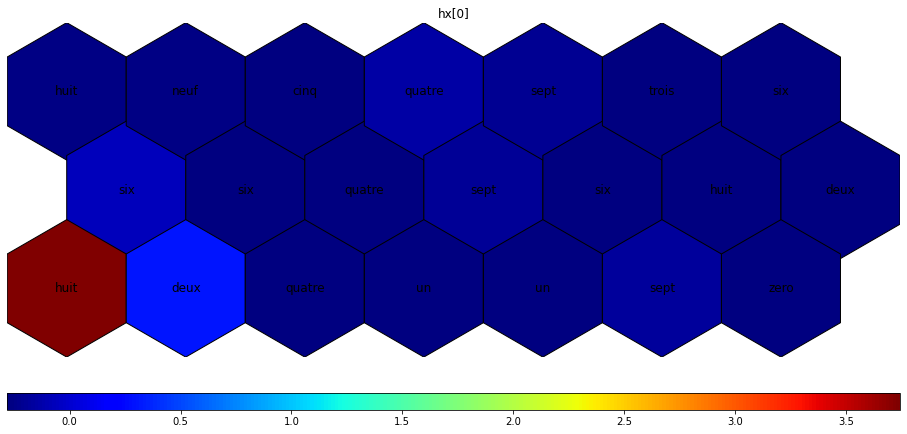

In [35]:
view2D  = View2D(16,10,
                 "codage "+strChoix,
                 text_size=10) ;
view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=1, which_dim=0, denormalize=True,labelsize=12) ; 

#### Classification Ascendante Hiérarchique
- **Affichage du dendrogramme des référents**

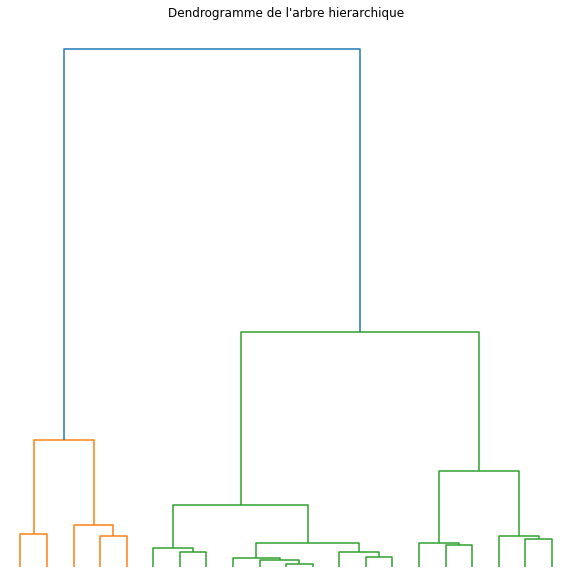

1

In [36]:
from dendrogram import DendrogramView
dendrogram = DendrogramView(10,10,"Dendrogramme de l'arbre hierarchique", text_size = 10)
dendrogram.show(sm)

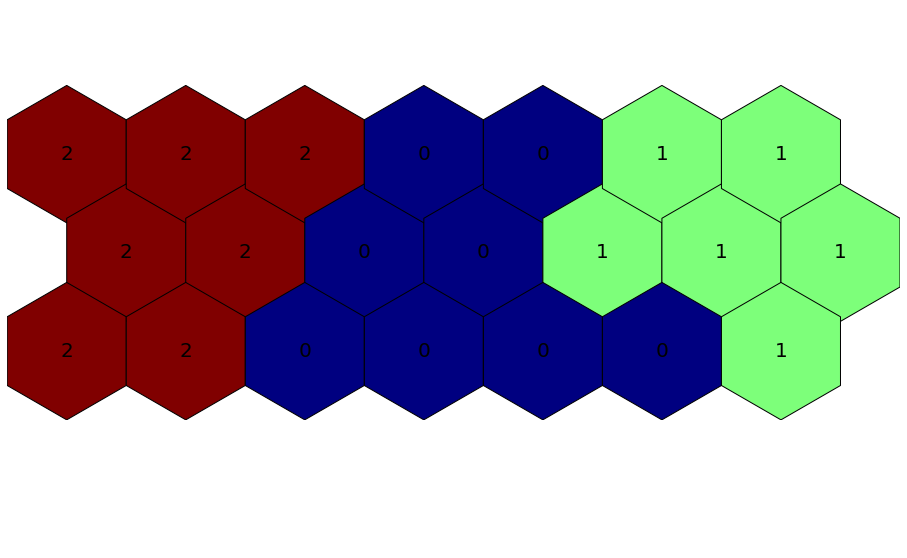

In [37]:
from hitmap import HitMapView
sm.cluster(3)
hits  = HitMapView(16,10,"Clustering",text_size=10)
a=hits.show(sm,labelsize=20)

#### Un peu de supervisé (pas toujours possible)
Comme les données sont associées à des classes, nous allons en profiter pour voir la correspondance entre les classes issues de la carte (déduites uniquement des entrées de la carte) et celles fournies avec les données.    
**On rappelle qu'il s'agit d'un algorithme non supervisé.**    
Ainsi, on ne prend pas en compte les classes lors de l'apprentissage.    
**On cherche donc à évaluer la capacité de la carte à discriminer ces classes. Cela ne pourra être fait que si les données des différentes classes sont bien distinctes dans l'espace des données (i.e. les entrées de la carte).** 

**Détermination des indices des classes estimées et désirées**

On ajoute la classe de rejet

In [38]:
classnames_ = classnames
classnames_.append('Nan')
classnames_ = np.array(classnames_)
classnames_

array(['zero', 'un', 'deux', 'trois', 'quatre', 'cinq', 'six', 'sept',
       'huit', 'neuf', 'Nan'], dtype='<U6')

Détermination des indices des classes désirées

In [39]:
_, classes_desirees = np.where(data_labels[:,None]==np.array(classnames)[None,:])
#classes_desirees

Par précaution, on recalcule les etiquettes des neurones

In [40]:
# classes esimees
data_labels_estim = neuron_labels[sm._bmu[0].astype(int)]
_, classes_estimees = np.where(data_labels_estim[:,None]==np.array(classnames)[None,:])
#classes_estimees

**Matrice de confusion**

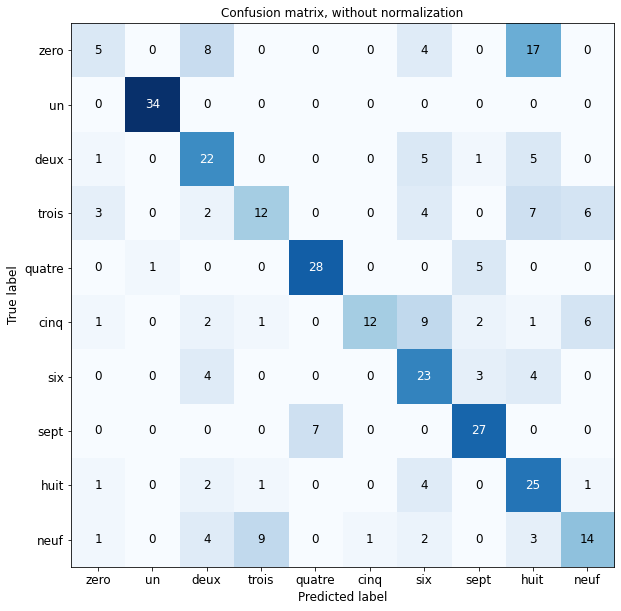

In [41]:
plt.figure(figsize=(10,10)) 
plot_confusion_matrix(classes_desirees, classes_estimees, classnames_,
                          title='', fontsize=12) ;